/kaggle/input/house-price-prediction/train.csv
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       Overa

Text(0, 0.5, 'salesprice')

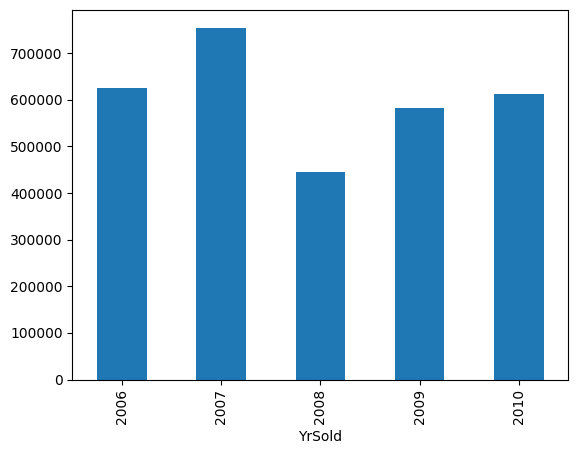

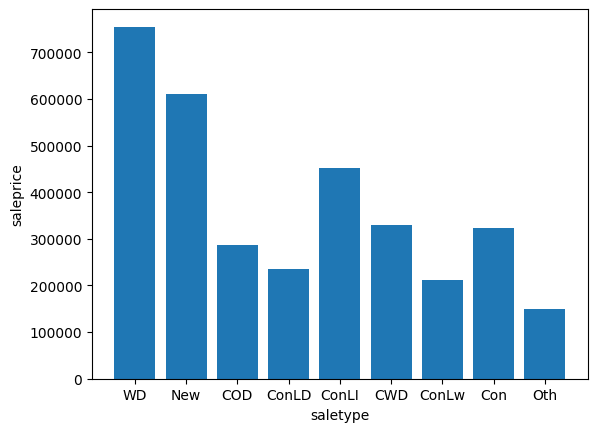

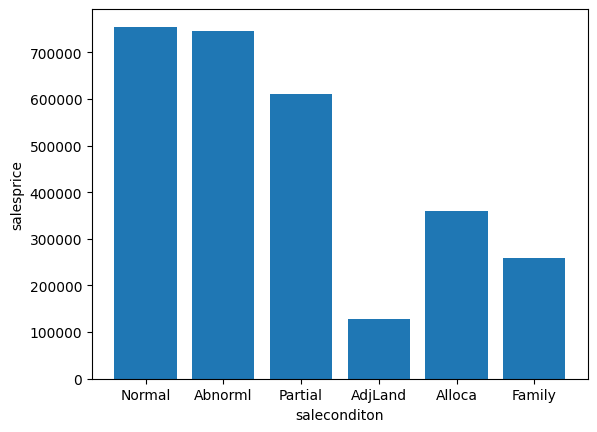

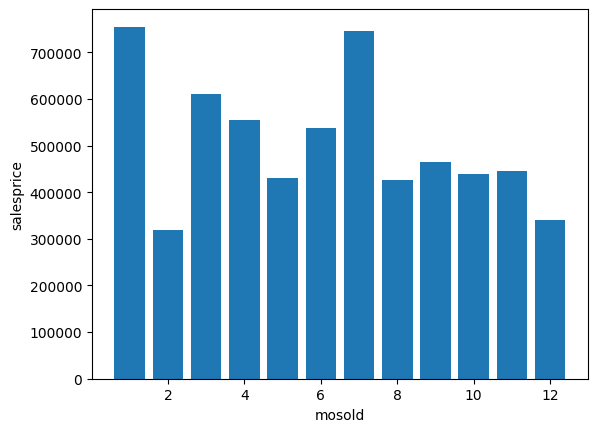

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
dt=pd.read_csv("/kaggle/input/house-price-prediction/train.csv")
dc=dt.copy()
print(dc.isnull().sum())
print(dc.describe())
print(dc.info())
dc=dc.drop("Id",axis=1)
y=dc.groupby("YrSold")["SalePrice"].max()
y.plot(kind="bar")
plt.figure()
plt.bar(dc["SaleType"],dc["SalePrice"])
plt.xlabel("saletype")
plt.ylabel("saleprice")
plt.figure()
plt.bar(dc["SaleCondition"],dc["SalePrice"])
plt.xlabel("saleconditon")
plt.ylabel("salesprice")
plt.figure()
plt.bar(dc["MoSold"],dc["SalePrice"])
plt.xlabel("mosold")
plt.ylabel("salesprice")

In [33]:
dc=dc.fillna(dc.mean(numeric_only=True ,skipna=True))


In [5]:
# define a function called "box_plot"
def box_plot(d,f):
    d.boxplot(column=[f])
    plt.grid(False)
    plt.show()

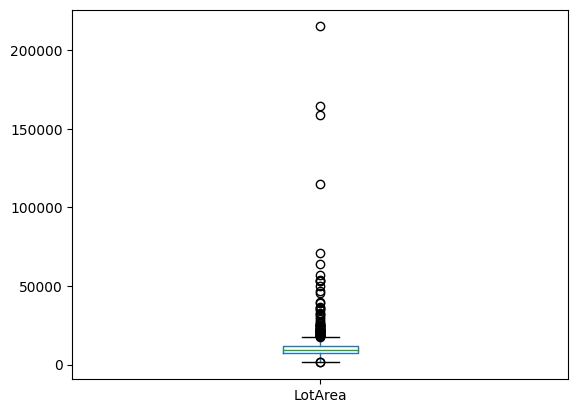

In [7]:
box_plot(dc,'LotArea')

In [20]:
# define a function called 'outliers' which returnd a list of index of outliers
#IQR=Q3-Q1
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    ls=df.index[(df[ft]<lb)|(df[ft]>ub)]
    return ls
print(outliers(dc,'LotArea'))

Index([  53,   66,  113,  120,  159,  171,  185,  197,  249,  260,  271,  277,
        304,  313,  335,  349,  364,  384,  411,  417,  422,  451,  457,  523,
        529,  558,  563,  588,  661,  664,  666,  691,  692,  706,  726,  769,
        807,  828,  848,  854,  876,  934,  939,  943,  956, 1010, 1039, 1048,
       1057, 1061, 1107, 1151, 1169, 1173, 1184, 1190, 1230, 1260, 1270, 1277,
       1287, 1298, 1346, 1383, 1396, 1409, 1423, 1430, 1446],
      dtype='int64')


In [37]:
#create an empty list to store the output indices from multiple columns
index_list=[]
numeric_column=dc.select_dtypes(include='number').columns.tolist()
for i in (numeric_column):
        index_list.extend(outliers(dc,i))
print(index_list)


[9, 48, 56, 75, 87, 93, 115, 125, 145, 165, 172, 180, 193, 195, 225, 227, 232, 235, 243, 246, 285, 291, 300, 312, 335, 344, 348, 363, 411, 430, 432, 434, 472, 488, 489, 490, 500, 504, 520, 535, 578, 599, 603, 614, 623, 635, 637, 649, 655, 675, 685, 687, 703, 705, 713, 755, 758, 829, 831, 837, 861, 914, 915, 956, 959, 962, 969, 971, 975, 985, 1007, 1029, 1030, 1038, 1039, 1062, 1068, 1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1219, 1236, 1265, 1266, 1291, 1297, 1304, 1334, 1358, 1364, 1367, 1378, 1393, 1416, 1449, 1452, 25, 35, 36, 41, 52, 56, 75, 85, 86, 145, 150, 159, 161, 171, 193, 195, 197, 225, 227, 231, 232, 235, 260, 264, 276, 277, 290, 302, 306, 313, 320, 363, 408, 429, 430, 432, 434, 446, 473, 489, 500, 504, 523, 599, 603, 614, 649, 655, 662, 673, 675, 758, 764, 774, 807, 825, 829, 831, 837, 889, 906, 909, 914, 915, 934, 956, 959, 962, 963, 966, 991, 1007, 1010, 1029, 1038, 1039, 1061, 1088, 1091, 1104, 1106, 1107, 1127, 1151, 1160, 1162, 1168, 1169, 1173, 1182

In [29]:
#define a function called "remvove" which returns a cleaned dataframe without outliers
def remove(dd,ls):
    ls=sorted(set(ls))
    dd=dd.drop(ls)
    return dd

In [32]:
cleaned=remove(dc,index_list)
print(cleaned)


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...  

In [34]:
dum=pd.get_dummies(cleaned,drop_first=True)
print(dum)
print(dum.corr())


      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=dum.drop("SalePrice",axis=1)
y=dum["SalePrice"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
clf=LinearRegression()
clf.fit(x_train,y_train)
price_predict=clf.predict(x_test)
print(price_predict)

[ 2.18488194e+05  1.12789247e+05  3.22735694e+05  2.93396299e+05
  2.29851308e+05  2.60109545e+05  8.80283052e+04  1.49758131e+05
  1.99326538e+05  1.09290657e+05 -6.89273395e+10  6.01529821e+04
  1.19530845e+05  1.49193308e+05  1.62041862e+05  1.71919528e+05
  2.04615906e+05  1.39466950e+05  1.60057545e+05  2.66973986e+05
  1.21936756e+05  1.72351163e+05  1.31134334e+05  3.53522046e+05
  2.11715910e+05  2.92544730e+05  2.77412747e+05  1.22618894e+05
  9.31008635e+04  1.73570373e+05  1.72787583e+05  1.39525985e+05
  3.48817444e+05  1.39843785e+05  2.43940902e+05  1.35734966e+05
 -2.07173741e+08  2.28378021e+05  1.97564340e+05  1.32253627e+05
  9.88824865e+04  1.00904799e+05  9.83838809e+04  2.06447673e+05
  1.76915546e+05  1.92790839e+05  1.60417206e+05  1.34949790e+05
  1.77853041e+05  1.21001725e+05  2.18798056e+05  1.04763900e+05
  1.01031808e+05  9.87591891e+04  2.11365461e+05  1.43620083e+05
  1.57966572e+05  1.32736720e+05  3.05400815e+05  3.06914903e+05
  1.95575922e+05  3.43955

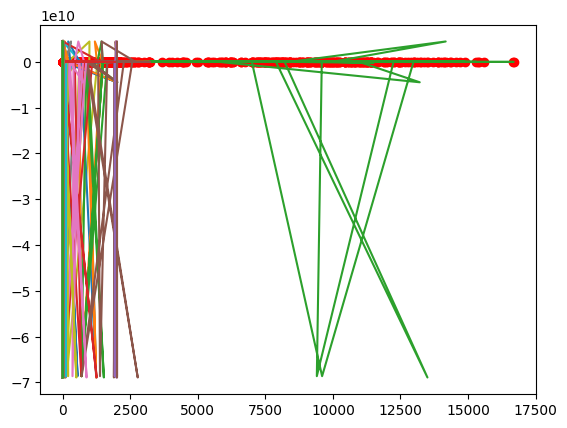

In [36]:
plt.plot(x_test,y_test,"ro")
plt.plot(x_test,price_predict)#line will represent the predicted price

In [ ]:
from sklearn.metrics import mean_squared_error
import math
slr_rmse=math.sqrt(mean_squared_error(y_test,price_predict))
print(slr_rmse)